In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, 0)
    return X, y

def my_perceptron(X, y, threshold=0.01, max_iter=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    misclassified = True
    iteration = 0
    
    # print(weights)

    while misclassified and iteration < max_iter:
        misclassified = False
        for i in range(n_samples):
            if np.dot(X[i], weights) + bias <= 0:
                weights += X[i] * y[i]
                bias += y[i]
                misclassified = True
        iteration += 1
        # print(X[i] , " -> " , weights)

    # print(weights)
    return weights, bias

def plot_separator(X, y, weights, bias):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    positive_indices = (y == 1)
    negative_indices = (y == 0)
    ax.scatter(X[positive_indices][:,0], X[positive_indices][:,1], X[positive_indices][:,2], c='b', label='Positive')
    ax.scatter(X[negative_indices][:,0], X[negative_indices][:,1], X[negative_indices][:,2], c='r', label='Negative')

    # Plot separator
    xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
    zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Load data
    X, y = load_data('lab02_dataset_1.csv')

    # print(y)
    # X = np.array([[1, 2], [2, 3], [2, 1], [3, 0]])
    # y = np.array([1, 1, 0, 0])

    X = np.array([[1, 2, 1] , [1, -2, 1] , [3, 1, 2], [2, 3, 2] , [-1, 2, -2] , [-1, -2, 4] , [1, -3, -3] , [-2, 4, -2] , [4, 1, 3] , [-1, 2, -4]])
    y = np.array([1,0,0,1,1,0,0,1,0,1])

    # Apply perceptron algorithm
    weights, bias = my_perceptron(X, y)
    print(weights)
    print(bias)
    # Plot dataset and separator
    # plot_separator(X, y, weights, bias)


[ 0.  4. -3.]
2


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'data'
data = pd.read_excel('lab02_dataset_2.xlsx', engine='openpyxl')

# Dropping missing values
data_complete = data.dropna()

# Extracting features and target variable
X = data_complete[['OCCUPATION', 'EDUCATION', 'CAR_TYPE']]
y = data_complete['CAR_USE']

# Converting categorical variables to numerical using label encoding
X_encoded = pd.get_dummies(X)

# Splitting the data into train and test sets (assuming you have test data)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Calculate feature counts
feature_counts = np.array([np.bincount(X_train[c]) for c in X_train.columns])

# Training Naive Bayes model with Laplace smoothing of 0.01
naive_bayes_model = CategoricalNB(alpha=0.01)
naive_bayes_model.fit(X_train, y_train)

# 1. Output Class counts and Probabilities P(Yj)
class_counts = naive_bayes_model.class_count_
class_probabilities = class_counts / np.sum(class_counts)

print("Class counts:", class_counts)
print("Probabilities P(Yj):", class_probabilities)

# 2. Output P(Xi|Yj) along with their counts
# Calculate feature probabilities
feature_probabilities = (feature_counts.T / class_counts).T

print("Feature Counts (P(Xi|Yj)):")
print(pd.DataFrame(feature_counts, columns=X_encoded.columns))
print("Feature Probabilities (P(Xi|Yj)):")
print(pd.DataFrame(feature_probabilities, columns=X_encoded.columns))

# 3. Predict probabilities for the test cases
test_case_1 = [[0, 1, 0]]  # [Blue Collar, PhD, SUV]
test_case_2 = [[2, 0, 1]]  # [Manager, Below High School, Sports Car]

probabilities_test_case_1 = naive_bayes_model.predict_proba(test_case_1)
probabilities_test_case_2 = naive_bayes_model.predict_proba(test_case_2)

print("Car Usage probabilities for Test Case 1:", probabilities_test_case_1)
print("Car Usage probabilities for Test Case 2:", probabilities_test_case_2)

# 4. Generate histogram of predicted probabilities of CAR_USE = Private
predicted_probabilities_private = naive_bayes_model.predict_proba(X_test)[:, 1]
plt.hist(predicted_probabilities_private, bins=np.arange(0, 1.05, 0.05), density=True)
plt.xlabel('Predicted Probability of CAR_USE = Private')
plt.ylabel('Proportion of Observations')
plt.title('Histogram of Predicted Probabilities')
plt.show()

# 5. Calculate misclassification rate
misclassification_rate = 1 - naive_bayes_model.score(X_test, y_test)
print("Misclassification rate:", misclassification_rate)


Class counts: [1641. 2931.]
Probabilities P(Yj): [0.35892388 0.64107612]


ValueError: operands could not be broadcast together with shapes (2,20) (2,) 

[ 0.  4. -3.]


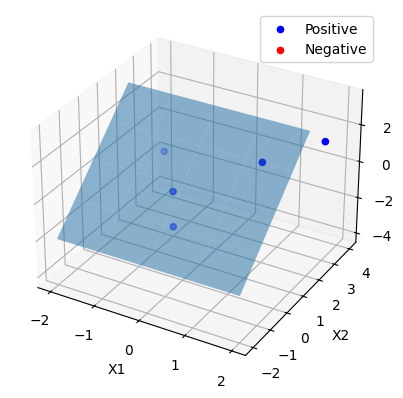

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, -1)
    return X, y

def my_perceptron(X, y, threshold=0.01, max_iter=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    misclassified = True
    iteration = 0

    while misclassified and iteration < max_iter:
        misclassified = False
        for i in range(n_samples):
            if np.dot(X[i], weights) + bias <= 0:
                weights += X[i] * y[i]
                bias += y[i]
                misclassified = True
        iteration += 1

    return weights, bias

def plot_separator(X, y, weights, bias):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    positive_indices = (y == 1)
    negative_indices = (y == -1)
    ax.scatter(X[positive_indices][:,0], X[positive_indices][:,1], X[positive_indices][:,2], c='b', label='Positive')
    ax.scatter(X[negative_indices][:,0], X[negative_indices][:,1], X[negative_indices][:,2], c='r', label='Negative')

    # Plot separator
    xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
    zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Load data
    # X, y = load_data('lab02_dataset_1.csv')

    # X = np.array([[1, 2, 1], [3, 4, 4], [5, 6, 6], [7, 8, 8]])
    # y = np.array([1, -1, 1, -1])

    # X = np.array([[1, 2], [2, 3], [2, 1], [3, 0]])
    # y = np.array([1, 1, 0, 0])

    X = np.array([[1, 2, 1] ,[1, -2, 1] ,[3, 1, 2], [2, 3, 2] ,[-1, 2, -2] ,[-1, -2, 4] ,[1, -3, -3] ,[-2, 4, -2] ,[4, 1, 3] ,[-1, 2, -4]])
    y = np.array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])
    
    # Apply perceptron algorithm
    weights, bias = my_perceptron(X, y)
    print(weights)
    # Plot dataset and separator
    plot_separator(X, y, weights, bias)


[-261.64427201 2762.67262315 1986.32461931]


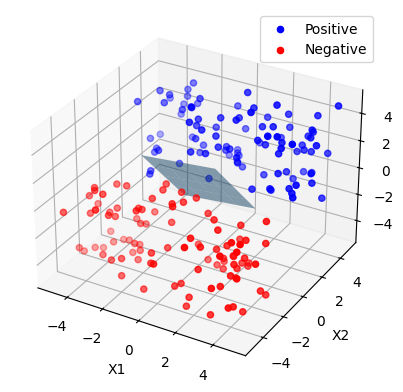

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, -1)
    return X, y

def my_perceptron(X, y, threshold=0.01, max_iter=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    misclassified = True
    iteration = 0

    while misclassified and iteration < max_iter:
        misclassified = False
        for i in range(n_samples):
            if np.dot(X[i], weights) + bias <= 0:
                weights += X[i] * y[i]
                bias += y[i]
                misclassified = True
        iteration += 1

    return weights, bias

def plot_separator(X, y, weights, bias):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    positive_indices = (y == 1)
    negative_indices = (y == -1)
    ax.scatter(X[positive_indices][:,0], X[positive_indices][:,1], X[positive_indices][:,2], c='b', label='Positive')
    ax.scatter(X[negative_indices][:,0], X[negative_indices][:,1], X[negative_indices][:,2], c='r', label='Negative')

    # Plot separator
    xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
    zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Load data
    X, y = load_data('lab02_dataset_1.csv')
    
    # Apply perceptron algorithm
    weights, bias = my_perceptron(X, y)
    print(weights)
    # Plot dataset and separator
    plot_separator(X, y, weights, bias)


[-1.58344476  0.49505282  5.25653946]
[-0.73733843, 3.09858631, 3.81258893]


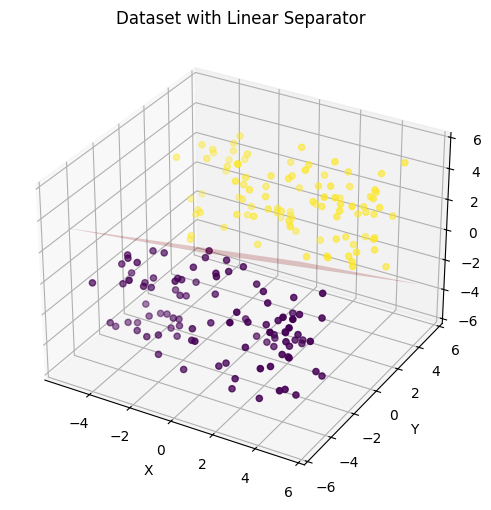

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from mpl_toolkits.mplot3d import Axes3D

def my_perceptron(data, max_iterations=1000):
    w = np.zeros(3)  # Initialize weight vector

    for _ in range(max_iterations):
        misclassified = 0

        for i in range(len(data)):
            x = np.array([data.iloc[i, 0], data.iloc[i, 1], data.iloc[i, 2]])
            y_true = 1 if data.iloc[i, 3] == 'Positive' else -1
            y_pred = np.dot(w, x)

            if y_true * y_pred <= 0:  # Misclassification
                misclassified += 1
                w = w + y_true * x  # Update weights

        if misclassified / len(data) < 0.01:  # Classification threshold met
            break

    return w

# Load dataset
data = pd.read_csv("lab02_dataset_1.csv")

classUnique = list(np.asarray(data['Class'].unique()))
classEncoder = OrdinalEncoder(categories=[list(classUnique)])
data['Class'] = classEncoder.fit_transform(data[['Class']])

# Apply perceptron algorithm
weights = my_perceptron(data)
print(weights)
weights = [-0.73733843  ,3.09858631  ,3.81258893]
print(weights)

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points with different colors for each class
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=data['Class'], cmap='viridis')

# Create a mesh for the linear separator plane
xlim = ax.get_xlim3d()
ylim = ax.get_ylim3d()
zlim = ax.get_zlim3d()
X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                   np.linspace(ylim[0], ylim[1], 50))
Z = -(weights[0] * X + weights[1] * Y) / weights[2]

# Plot the linear separator plane
ax.plot_surface(X, Y, Z, alpha=0.2, color='red')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Dataset with Linear Separator')
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def my_perceptron(data, thresholdRate=0.01):
    # Extract features and labels from the dataset
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, -1)

    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0
    misclassificationRate = 1.0

    while misclassificationRate > thresholdRate:
        misclassifiedDataPoints = 0
        for i in range(len(X)):
            print("Weights : ",weights)
            if y[i] * (np.dot(X[i], weights) + bias) <= 0:
                weights += y[i] * X[i]
                bias += y[i]
                misclassifiedDataPoints += 1

        misclassificationRate = misclassifiedDataPoints / len(X)

    return np.concatenate(([bias], weights))

# Load dataset
data = pd.read_csv("lab02_dataset_1.csv")

# Apply perceptron algorithm
weights = my_perceptron(data)
print(weights)

Weights :  [0. 0. 0.]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [2.15326928 1.9100922  2.08920045]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.42089123  4.94870519  2.21729411]
Weights :  [-2.4208912

In [3]:
weights

array([1.        , 1.84681269, 9.36416834, 2.88002315])

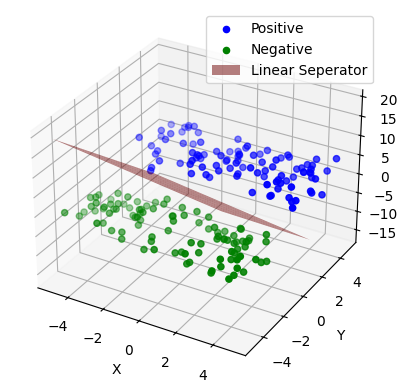

In [10]:
plot3D = plt.figure()
figure = plot3D.add_subplot(111, projection='3d')

figure.scatter(
    data.loc[data['Class'] == 'Positive', 'X'],
    data.loc[data['Class'] == 'Positive', 'Y'],
    data.loc[data['Class'] == 'Positive', 'Z'],
    color='blue', 
    label='Positive'
)

figure.scatter(
    data.loc[data['Class'] == 'Negative', 'X'],
    data.loc[data['Class'] == 'Negative', 'Y'],
    data.loc[data['Class'] == 'Negative', 'Z'],
    color='green', 
    label='Negative'
)

# now start building a mesh grid for the linear seperator
x_axis, y_axis = np.meshgrid(range(-5, 5), range(-5, 5))
z_axis = (-weights[0] - weights[1] * x_axis - weights[2] * y_axis) / weights[3]

figure.plot_surface(x_axis, y_axis, z_axis, color='red', alpha=0.5, label='Linear Seperator')

figure.set_xlabel('X')
figure.set_ylabel('Y')
figure.set_zlabel('Z')
plt.legend()
plt.show()

In [ ]:
import numpy as np

def my_perceptron(X, y):
    # Append a column of 1s to X for bias
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Initialize weights randomly
    np.random.seed(0)
    weights = np.random.rand(X.shape[1])
    
    # Perceptron learning rate
    learning_rate = 0.1
    
    # Maximum number of iterations
    max_iterations = 1000
    
    # Threshold for misclassification rate
    threshold = 0.01  # 1%
    
    # Perceptron algorithm
    iteration = 0
    while iteration < max_iterations:
        misclassified = 0
        for i in range(X.shape[0]):
            # print("weights : " , weights , " | X[i] " , X[i])
            if np.dot(X[i], weights) >= 0:
                predicted_class = 1
            else:
                predicted_class = 0
            if predicted_class != y[i]:
                misclassified += 1
                weights += learning_rate * y[i] * X[i]
        misclassification_rate = misclassified / X.shape[0]
        if misclassification_rate < threshold:
            break
        iteration += 1
    
    return weights

data = pd.read_csv('lab02_dataset_1.csv')

classUnique = list(np.asarray(data['Class'].unique()))
classEncoder = LabelEncoder()
data['Class'] = classEncoder.fit_transform(data[['Class']])
print(data.head())
weights = my_perceptron(data[['X','Y','Z']], data['Class'])
print(weights)

          X         Y         Z  Class
0 -2.153269 -1.910092 -2.089200      0
1  3.354634 -1.803199 -2.849789      0
2 -2.773528  4.644997  2.412375      1
3  2.890608 -1.188494 -1.723388      0
4 -3.416683  4.789795  3.157649      1
[0.6488135  0.25777332 0.90662468 0.55769255]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
